In [1]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB

In [3]:
train = pd.read_csv("final_train.csv")

In [4]:
y = train.LoanStatus
X = train.drop('LoanStatus',axis=1)

In [5]:
X = pd.get_dummies(X)

In [6]:
X

,Dependents,LoanAmountTerm,CreditHistory,LoanAmountLog,IncomeLog,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,SelfEmployed_No,SelfEmployed_Yes,PropertyArea_Rural,PropertyArea_Semiurban,PropertyArea_Urban
0,0,360.0,1.0,4.844187,8.674026,False,True,True,False,True,False,True,False,False,False,True
1,1,360.0,1.0,4.852030,8.714568,False,True,False,True,True,False,True,False,True,False,False
2,0,360.0,1.0,4.189655,8.006368,False,True,False,True,True,False,False,True,False,False,True
3,0,360.0,1.0,4.787492,8.505323,False,True,False,True,False,True,True,False,False,False,True
4,0,360.0,1.0,4.948760,8.699515,False,True,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,0,360.0,1.0,4.262680,7.972466,True,False,True,False,True,False,True,False,True,False,False
560,3,180.0,1.0,3.688879,8.320205,False,True,False,True,True,False,True,False,True,False,False
561,1,360.0,1.0,5.533389,9.025456,False,True,False,True,True,False,True,False,False,False,True
562,2,360.0,1.0,5.231109,8.933664,False,True,False,True,True,False,True,False,False,False,True


## Check cross validation scores with different algorithms 

In [8]:
from sklearn.model_selection import cross_val_score
all_scores = {}  

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [10]:
names = ['LR','KNN','NB','DT','SVC']
clfs =  [LogisticRegression(max_iter=200), KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier(max_depth=5),LinearSVC(max_iter=2000)]

In [11]:
for clf,name in zip(clfs, names):
   scores = cross_val_score(clf,X_scaled,y,cv=3)
   print(scores)
   print(f"{name} = {scores.mean()*100:0.2f}")
   all_scores[name] = (scores.mean() * 100)

[0.80851064 0.79787234 0.80851064]
LR = 80.50
[0.7712766  0.74468085 0.7393617 ]
KNN = 75.18
[0.78723404 0.79787234 0.80851064]
NB = 79.79
[0.75       0.79255319 0.75      ]
DT = 76.42


e:\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
e:\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
e:\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[0.80851064 0.79787234 0.83510638]
SVC = 81.38


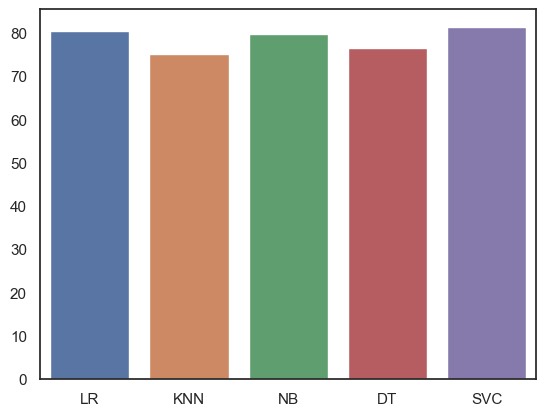

In [12]:
plt = sns.barplot(x = list(all_scores.keys()), y = list(all_scores.values()))
#ax = plt.set_xticklabels(labels = all_scores.keys())